# Heart Diease Prediction

### MAY 7, 2024

**Important parameters**:
 - Number of instances: 302
 - Number of attributes: 14 attributes
        
**Each of the attributes**:
 - age: Age in years
 - sex: Sex(1= male, 0= female)
 - cp: Chest pain type (Value 1: typical angina, Value 2: atypical angina, Value3: non-aginal pain, Value 4: asymptomatic)
 - trestbps: Resting blood pressure (in mmHg on admission to the hospital)
 - chol: Serum Cholestoral in mg/dl
 - fbs: fast blood sugar > 120 mg/dl (1= true, 0=false)
 - restecg: Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality (T wave inversions and/or St elevation or depression of > 0.05mV, 2: showing probabal or definite left ventricular hypertrophy by Estes'criteria)
 - thalach: Maximum heart rate achieved
 - exang: Excercise included angina (1= yes, 0=no)
 - oldpeak: ST depression indced by exercise relative to rest
 - slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
 - ca : Number of major vessels (0-3) colored by flourosopy
 - thal: 3= normal, 6= fixed defect, 7= reversable defect
 - HeartDisease: Diagnosis of heart disease- angiprahic disease status (Value 0: <50% diameter narrowing, Value 1: > 50% diameter narrowing) in any major vessel: attributes 59 through 68 are vessels


In [1]:
# importing libraries needed for the processing and exploration of the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

import warnings 
warnings.filterwarnings("ignore", category = FutureWarning)

plt.style.use('ggplot')


In [2]:
# dataframe is read from the excel file - Ch3.ClevelandData.xlsx

names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','hal','HeartDisease']
Data = pd.read_excel(r"C:\Users\olayi\Downloads\Ch3.ClevelandData.xlsx", names = names)



In [3]:
# a quick preview of the data - first 5 instances of the dataframe

Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [4]:
# data exploration

print('Number of Patients: ' + str(len(Data.index.unique())))
print('Number of Patients with Heart Dieases: '+ str(len(Data[Data['HeartDisease']==1].index.unique())))
print('Number of Patients without Heart Dieases: '+ str(len(Data[Data['HeartDisease']==0].index.unique())))
print('Percentage of Patients with Heart Diseases: '+ str(round(100*len(Data[Data['HeartDisease']==1].index.unique())/len(Data.index.unique()),1)) + '%')
print()                                                          
display.display(Data.info(null_counts=1))
display.display(Data.describe())                                                          


Number of Patients: 302
Number of Patients with Heart Dieases: 139
Number of Patients without Heart Dieases: 163
Percentage of Patients with Heart Diseases: 46.0%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           302 non-null    int64  
 1   sex           302 non-null    int64  
 2   cp            302 non-null    int64  
 3   trestbps      302 non-null    int64  
 4   chol          302 non-null    int64  
 5   fbs           302 non-null    int64  
 6   restecg       302 non-null    int64  
 7   thalach       302 non-null    int64  
 8   exang         302 non-null    int64  
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    int64  
 11  ca            302 non-null    object 
 12  hal           302 non-null    object 
 13  HeartDisease  302 non-null    int64  
dtypes: float64(1), int64(11), object(2)
me

None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,HeartDisease
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.460265
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.499246
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Dataset consists of 302 unique observations. The dataset is relatively balanced with the 46% patients with heart disease. The 'HeartDisease' column has a balance instances for the two classes(0 and 1). There is no missing values in the columns.Looking at the maximum and minimum in the descriptive analysis, there is seems to be no outliers in the variables. But analysis and visualisation will be done to confirm this.

In [5]:
# changing the data types of some categorical or binary columns from int to objects
binary_var = ['sex', 'cp', 'fbs', 'restecg',
       'exang', 'slope', 'ca', 'hal', 'HeartDisease']
Data[binary_var] = Data[binary_var].astype('object')

# confirm the chnaged data type
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           302 non-null    int64  
 1   sex           302 non-null    object 
 2   cp            302 non-null    object 
 3   trestbps      302 non-null    int64  
 4   chol          302 non-null    int64  
 5   fbs           302 non-null    object 
 6   restecg       302 non-null    object 
 7   thalach       302 non-null    int64  
 8   exang         302 non-null    object 
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    object 
 11  ca            302 non-null    object 
 12  hal           302 non-null    object 
 13  HeartDisease  302 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 33.2+ KB


## Data Distribution


In [6]:
# Checking the values count of the categorical variables
print('sex Distribution \n', Data['sex'].value_counts())
print()
print('cp Distribution \n', Data['cp'].value_counts())
print()
print('fbs Distribution \n', Data['fbs'].value_counts())
print()
print('rwstecg Distribution \n', Data['restecg'].value_counts())
print()
print('exang Distribution \n', Data['exang'].value_counts())
print()
print('slope Distribution \n', Data['slope'].value_counts())
print()
print('ca Distribution \n', Data['ca'].value_counts())
print()
print('hal Distribution \n', Data['hal'].value_counts())
print()
print('Heart Disease Distribution \n', Data['HeartDisease'].value_counts())

sex Distribution 
 1    205
0     97
Name: sex, dtype: int64

cp Distribution 
 4    144
3     86
2     50
1     22
Name: cp, dtype: int64

fbs Distribution 
 0    258
1     44
Name: fbs, dtype: int64

rwstecg Distribution 
 0    151
2    147
1      4
Name: restecg, dtype: int64

exang Distribution 
 0    203
1     99
Name: exang, dtype: int64

slope Distribution 
 1    142
2    140
3     20
Name: slope, dtype: int64

ca Distribution 
 0    175
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

hal Distribution 
 3    166
7    117
6     17
?      2
Name: hal, dtype: int64

Heart Disease Distribution 
 0    163
1    139
Name: HeartDisease, dtype: int64


There is inconsistency in ca and hal columns. There '?' with 4 and 2 instances respectively. This instances will be removed. 

In [7]:
# removing the instance with '?' from the ca and hal columns
Data = Data[Data['ca'] != '?']
Data = Data[Data['hal'] != '?']

# print the distribution again to confirm the chnage
print('ca Distribution \n', Data['ca'].value_counts())
print()
print('hal Distribution \n', Data['hal'].value_counts())

ca Distribution 
 0    173
1     65
2     38
3     20
Name: ca, dtype: int64

hal Distribution 
 3    164
7    115
6     17
Name: hal, dtype: int64


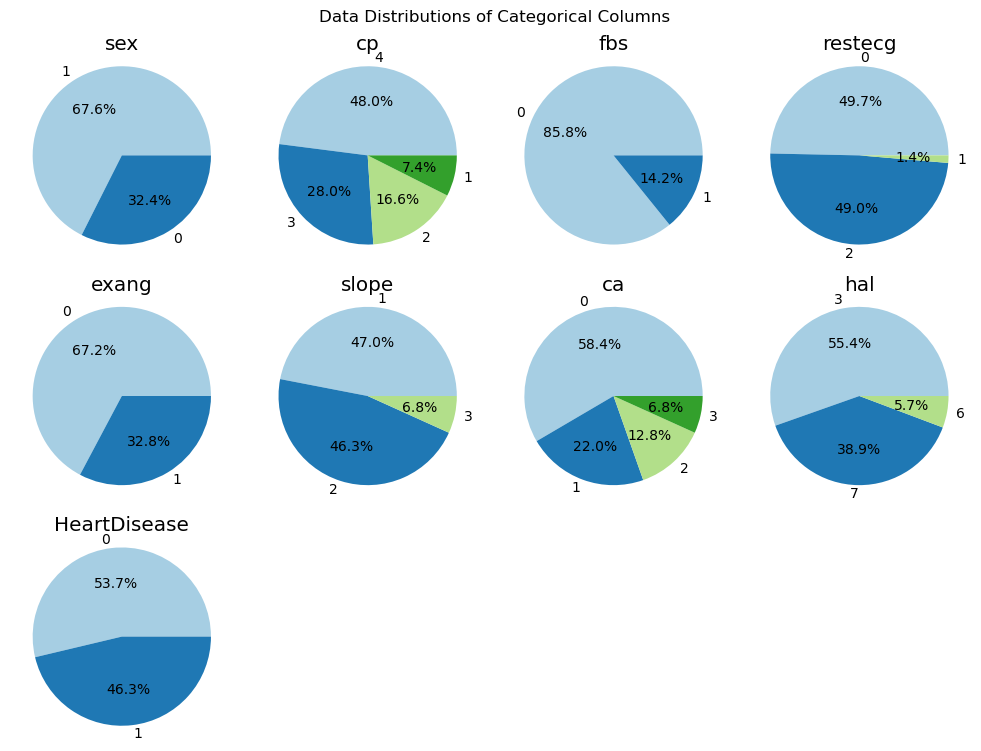

In [8]:
# Using Pie charts to visualize the binary and categorical columns in the dataset
categorical_df = Data[binary_var]

plt.figure(figsize = (10,10))
plt.suptitle('Data Distributions of Categorical Columns', fontsize=12)
for i in range(1,categorical_df .shape[1] + 1):
    plt.subplot(4, 4, i)
    
    values = categorical_df.iloc[:, i-1].value_counts(normalize = True).values
    index = categorical_df.iloc[:, i-1].value_counts(normalize = True).index
    
    plt.title(categorical_df.columns.values[i - 1])  
    plt.pie(values, labels = index, autopct= '%1.1f%%', colors = sns.color_palette("Paired"))
    plt.axis('equal')
plt.tight_layout()
plt.show() 

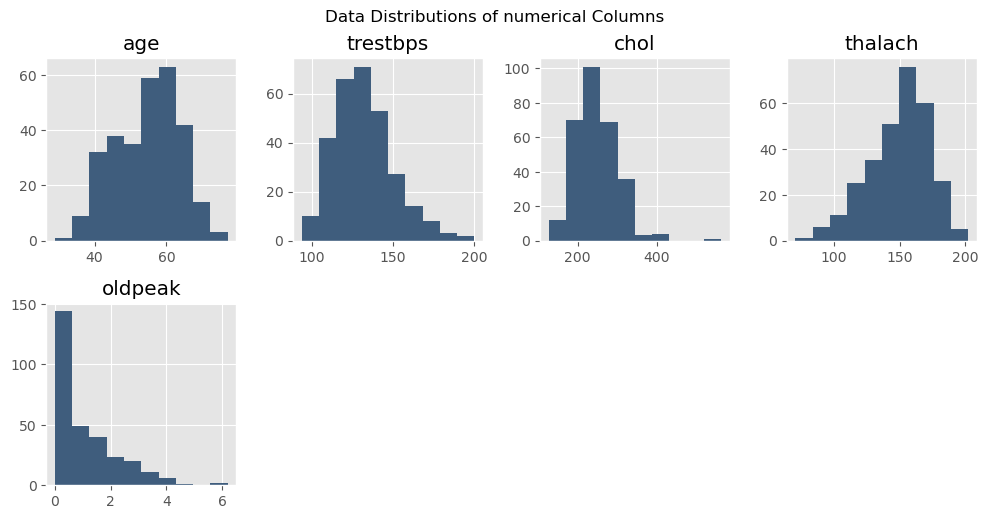

In [9]:
numerical_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
numerical_df = Data[numerical_var]

# Uisng histogram to visualize the disrtibutions of numerical columns in the dataset
plt.figure(figsize = (10,10))
plt.suptitle('Data Distributions of numerical Columns', fontsize=12)
for i in range(1, numerical_df .shape[1] + 1):
    plt.subplot(4, 4, i)
    plt.title(numerical_df .columns.values[i - 1])  
    plt.hist(numerical_df.iloc[:, i - 1], bins=10, color='#3F5D7D')
plt.tight_layout()
plt.show()  

In the histogram distribution above, trestbps, chol, oldpeak are right skewed

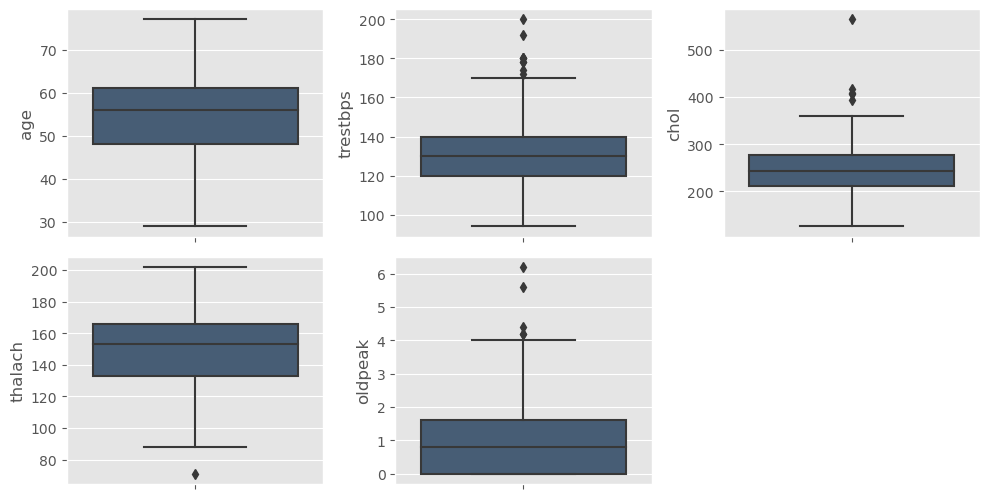

In [10]:
# Outliers

numerical_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Using Boxplot to visualize outliers in numerical variable columns in the Dataset 

fig = plt.figure(figsize = (10,10))
count = 0
for var in numerical_var:
    count += 1
    plt.subplot(4, 3, count)
    ax = sns.boxplot(y = var, data = Data, color='#3F5D7D')
    
fig.tight_layout()
plt.show()

In [11]:
# Calculate outliers using IQR method
outliers = {}
outliers_rows = pd.DataFrame(columns=numerical_df.columns) 
for col in numerical_var:
    Q1 = numerical_df[col].quantile(0.25)
    Q3 = numerical_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify rows with outliers
    outlier_rows = ((numerical_df[col] < lower_bound) | (numerical_df[col] > upper_bound))
    
    # Count and store the number of outliers
    outliers_count = outlier_rows.sum()
    outliers[col] = outliers_count
    
    # Store rows with outliers
    outliers_rows = outliers_rows.append(numerical_df[outlier_rows])
    
    # Remove rows with outliers
    #numerical_df = numerical_df[~outlier_rows]

print("Outliers count in each numerical column:")
print(outliers)
print()
# Display the rows containing outliers
print("Rows containing outliers:")
print(outliers_rows)

Outliers count in each numerical column:
{'age': 0, 'trestbps': 9, 'chol': 5, 'thalach': 1, 'oldpeak': 5}

Rows containing outliers:
    age trestbps chol thalach  oldpeak
13   52      172  199     162      0.5
82   68      180  274     150      1.6
125  56      200  288     133      4.0
171  59      174  249     143      0.0
182  59      178  270     145      4.2
187  54      192  283     195      0.0
200  64      180  325     154      0.0
212  66      178  228     165      1.0
230  55      180  327     117      3.4
47   65      140  417     157      0.8
120  63      150  407     154      4.0
151  67      115  564     160      1.6
172  62      140  394     157      1.2
180  56      134  409     150      1.9
244  67      120  237      71      1.0
90   62      160  164     145      6.2
122  55      140  217     111      5.6
182  59      178  270     145      4.2
190  51      140  298     122      4.2
284  58      114  318     140      4.4



In the dataset we're analyzing, age shows no outliers, while Thalach has only one outlier. However, variables such as Trestps, chol, and oldpeak exhibit 9, 5, and 5 outliers respectively.

It's crucial to recognize that outliers may contain valuable insights into the underlying data patterns. Removing them indiscriminately can lead to information loss and potentially bias the model, particularly towards dominant data trends or specific patterns. 

When dealing with health-related data like this, extreme values may signify critical health conditions in patients, and while impossible or highly improbable values should be excluded, caution should be exercised in removing outliers associated with significant health indicators.

Considering this, my recommendation would be to retain the dataset without removing outliers and instead explore robust modeling techniques that are inherently less affected by outlier influence. This approach ensures that the model captures the nuances of the data while minimizing the risk of bias introduced by outlier removal.

### Cross analsysis -  Age and Gender compared with the target (HeartDisease) 

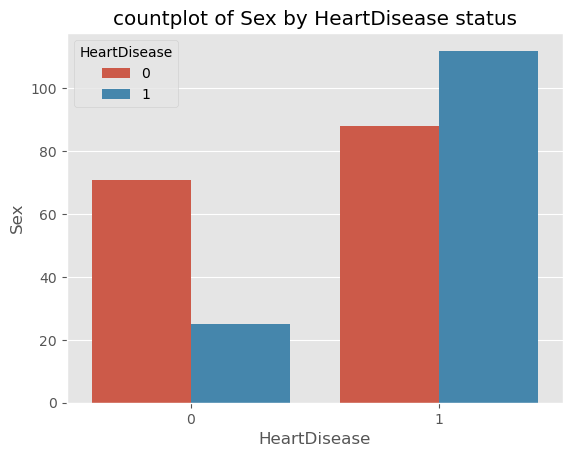

<Figure size 640x480 with 0 Axes>

In [12]:
# Uisng count plot to compare Age to the target in the dataset
sns.countplot(x= 'sex', hue ='HeartDisease', data=Data)
plt.title('countplot of Sex by HeartDisease status')
plt.xlabel('HeartDisease')
plt.ylabel('Sex')
plt.show()
plt.tight_layout()
plt.show()  

Based on the analysis, males are 88% more likely to have heart disease compared to females.

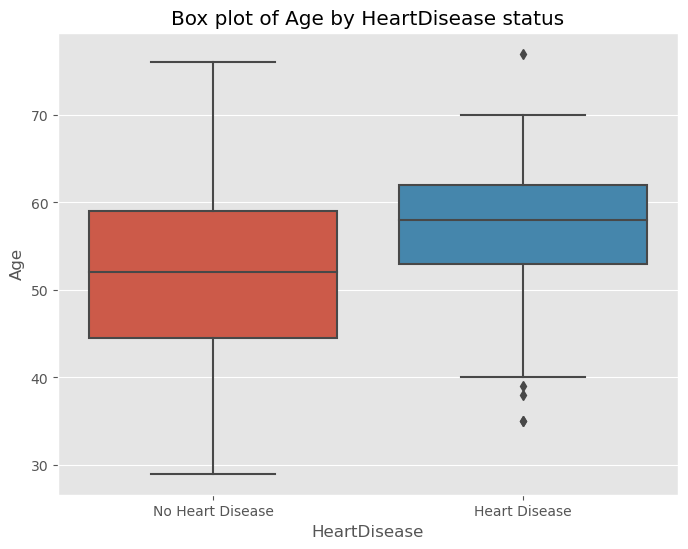

In [13]:
# Using box plot to compare Age to the target in the dataset
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='age', data=Data)
plt.title('Box plot of Age by HeartDisease status')
plt.xlabel('HeartDisease')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

Individuals with heart disease tend to be older on average compared to those without heart disease, as evidenced by the higher median age.
The interquartile range (IQR), represented by the length of the box, is narrower for individuals with heart disease compared to those without heart disease.
The upper quartile (Q3) for individuals with heart disease is higher than the upper quartile for individuals without heart disease , indicating that the older age range is more prevalent among individuals with heart disease.

The higher median and upper quartile ages among individuals with heart disease imply that advancing age is associated with an increased risk of developing heart disease.

<Axes: >

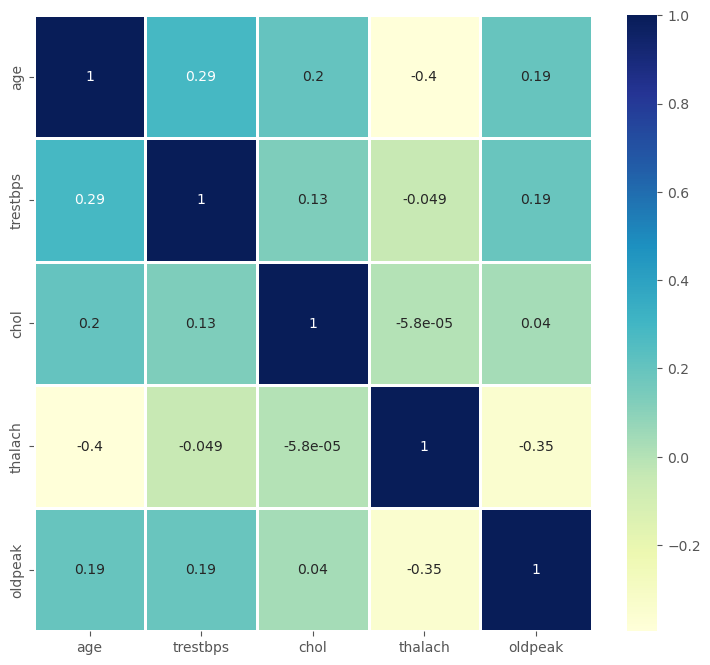

In [14]:
 # Correlation matrix between the attributes in the dataset to find if any␣attributes are correlated
corrmat= Data.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)


### Machine learning Models


In [15]:
# Creating dummy variables for our categorical variables.
Data = pd.get_dummies(Data, drop_first= True)

print(Data.head())



   age  trestbps  chol  thalach  oldpeak  sex_1  cp_2  cp_3  cp_4  fbs_1  ...  \
0   67       160   286      108      1.5      1     0     0     1      0  ...   
1   67       120   229      129      2.6      1     0     0     1      0  ...   
2   37       130   250      187      3.5      1     0     1     0      0  ...   
3   41       130   204      172      1.4      0     1     0     0      0  ...   
4   56       120   236      178      0.8      1     1     0     0      0  ...   

   restecg_2  exang_1  slope_2  slope_3  ca_1  ca_2  ca_3  hal_6  hal_7  \
0          1        1        1        0     0     0     1      0      0   
1          1        1        1        0     0     1     0      0      1   
2          0        0        0        1     0     0     0      0      0   
3          1        0        0        0     0     0     0      0      0   
4          0        0        0        0     0     0     0      0      0   

   HeartDisease_1  
0               1  
1               1  
2 

In [16]:
# define the features and target variable

X = np.array(Data.drop(columns = ['HeartDisease_1']))
y = np.array(Data['HeartDisease_1'])


In [17]:
# Splitting the dataset to train and test set
from sklearn.model_selection import train_test_split

#peforming 80-20% train_test split on data
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# performing featured scaling only on the numerical varible in dataset
from sklearn.preprocessing import StandardScaler

# scaling original dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)


In [19]:
# Checking the size of the splits 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)



X_train: (236, 20)
y_train: (236,)
X_test: (60, 20)
y_test: (60,)


### Train the model


In this analysis, I employed various machine learning models on the training dataset. Following this, I evaluated their performance using key metrics such as accuracy, F1 score, recall, and precision. These metrics serve as crucial indicators to determine the efficacy of each model in capturing the underlying patterns within the data. Ultimately, the model exhibiting the highest performance across these metrics on the training set will be selected for further utilization in predicting outcomes on our test datasets. This rigorous evaluation process ensures that the chosen model demonstrates robust predictive capabilities and generalizability beyond the training data, thereby enhancing the reliability of our predictive analytics endeavors.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [21]:
#define scoring method
scoring ='accuracy'
#define the model to train
names = ["Nearest Neighbors", "Gaussian Process","Decision Tree","Random Forest",
         "Neural Net", "AdaBoost", "Xgboost", "CatBoost","Naive Bayes Gaussian", "SVM Linear","SVM RBF","SVM Sigmoid"]
classifiers =[
    KNeighborsClassifier(n_neighbors=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10,max_features=1),
    MLPClassifier(max_iter=1000, alpha=0.001),
    AdaBoostClassifier(),
    XGBClassifier(),
    CatBoostClassifier(verbose=0),
    GaussianNB(),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    SVC(kernel='sigmoid')
]
models =zip(names,classifiers)
# evaluate each model in turn
results = []
names=[]
for name,model in models:
    kfold = model_selection.KFold(n_splits = 10, shuffle=True, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)
    
    model.fit(X_train,y_train)
    predictions= model.predict(X_test)
    print(name)
    
    print(classification_report(y_test,predictions))


Nearest Neighbors: 0.7585144927536233 (0.08782794785659456)
Nearest Neighbors
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        36
           1       0.88      0.58      0.70        24

    accuracy                           0.80        60
   macro avg       0.82      0.76      0.78        60
weighted avg       0.81      0.80      0.79        60

Gaussian Process: 0.8302536231884057 (0.07008809568906756)
Gaussian Process
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.86      0.79      0.83        24

    accuracy                           0.87        60
   macro avg       0.87      0.85      0.86        60
weighted avg       0.87      0.87      0.87        60

Decision Tree: 0.7248188405797101 (0.0996688027812469)
Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        36
           1  

Each section of the output provides information about a specific machine learning model and its performance metrics.

- **Model Performance**: The first line of each section shows the mean accuracy score achieved by the model during cross-validation, followed by the standard deviation in parentheses. This indicates how consistent the model's performance was across different folds of the data.

- **Model Evaluation**: After the mean accuracy score, there is a detailed evaluation of the model's performance on the test set. This evaluation includes metrics such as precision, recall, and F1-score for each class (0 and 1) as well as the overall accuracy. These metrics provide insights into how well the model is performing in terms of correctly identifying the positive and negative classes, as well as the balance between precision and recall.

- **Interpretation**: Overall, these results allow us to compare the performance of different machine learning models and determine which one performs best for predicting heart disease. In this case, we can see that some models, such as Gaussian Process, Naive Bayes Gaussian, and SVM RBF, achieve higher accuracy and balanced performance across precision, recall, and F1-score, indicating their effectiveness in classifying the data. The SVM RBF has the highest accuracy (88%) and also have the highest precision and recall for predicting heart disease (class 1). 


Accuracy Score: 0.8833333333333333
AUC Score: 0.8819444444444444


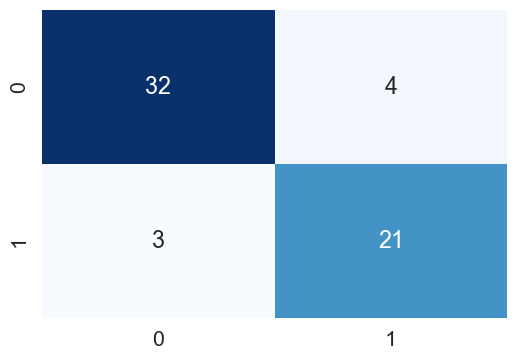

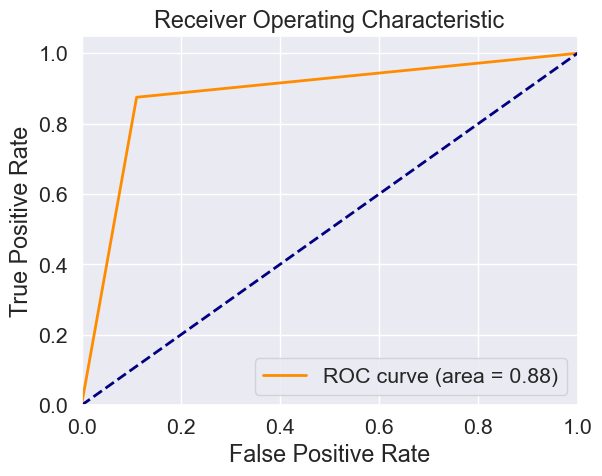

In [22]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# Train the SVM RBF model
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Make predictions on the test data
predictions = svm_rbf.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(conf_matrix, index =(0,1), columns = (0, 1))
plt.figure(figsize = (6,4))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt='g', cmap='Blues', cbar=False)

# Compute the accuracy score
acc_score = accuracy_score(y_test, predictions)
print("Accuracy Score:", acc_score)

# Compute the AUC score
auc_score = roc_auc_score(y_test, predictions)
print("AUC Score:", auc_score)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In the context of heart disease prediction using an SVM model, the confusion matrix, accuracy score, and AUC score provide valuable insights into the model's performance.

1. **Confusion Matrix**:
   In confusion matrix:
     - True Positives (TP): 32 cases were correctly predicted as positive (heart disease present).
     - True Negatives (TN): 21 cases were correctly predicted as negative (no heart disease present).
     - False Positives (FP): 4 cases were incorrectly predicted as positive (false alarms).
     - False Negatives (FN): 3 cases were incorrectly predicted as negative (missed cases of heart disease).
   - Overall, the model has a good balance of correctly identifying both positive and negative cases, with a small number of misclassifications.

2. **Accuracy Score**:
   - The accuracy score is 0.883, indicating that the model correctly classified approximately 88.3% of the cases in the test set.

3. **AUC Score**:
   - The AUC (Area Under the Curve) score represents the area under the receiver operating characteristic (ROC) curve. It measures the ability of the model to distinguish between positive and negative classes.
   - The AUC score ranges from 0 to 1, where a score closer to 1 indicates better performance.
   - In this case, the AUC score is 0.882, indicating that the SVM model has good discriminatory power in distinguishing between individuals with and without heart disease.

In [23]:
# Deploying For the front end
import pickle

# Save the trained model to a file
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_rbf, file)
